# Patrick Conroy 
# Dr. Delvin
# MSDS 599
# Final Project 
# 

In [561]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,ward 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score

# The data and aid was found at Kaggle:
https://www.kaggle.com/datasets/anamvillalpando/world-happiness-ranking 


In [562]:
data = pd.read_csv("~/Desktop/Happiness.csv") 

In [563]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


# Description of Data
_Country Name: Is the name of the country 
_Regional Incicatior: is the grouping that each country falls into geographically 
_Ladder Score: Is an approximated metric based on Happiness
_Standard Error of Ladder Score: IS just that
_ Upper and Lower wisker are metrics that I am not sure about I beleive that it has to do with the Ladder score
_ Logged GDP per capita is the gdp for the respective country 
_ Socail support is a metric measuring the amount of support provided by the government of the respective country 
_ Healthy life expectacy is an average life expectency for a citizen of each respective country
_ Freedom to make choices is a metric to measure how free a country is 
_ Generosity: Metric of how much citizens care for the marginalized 
_ Perceptions of Curruption: Measures Government redundencies that negativly impact citizens
_ Ladder score in Dystopia: Measure of how dangerous the country is with respect to the ability to provide for furture needs of citezens 
_ Explained by: Log GDP per capita: Normalized GDP 
_ Explained by: Social support: Metric explained by Socia Support variable 
_ Explained by: Healthy life expectancy: Metric explained by the Life expanacy 
_ Explained by: Freedom to make life choices: Impact of freedom on citizens 
_Explained by: Generosity: Metric explaining the Generosity
_Explained by: Perceptions of corruption: Net explaination of the effect of currption on citizens 
_ Dystopia + residual: Metric on measured dystopia 


# Intro Visuals

In [564]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    data = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/var/folders/rv/p7k6sc6n5tq034kkhrc70cmw0000gn/T/ipykernel_4579/82734749.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


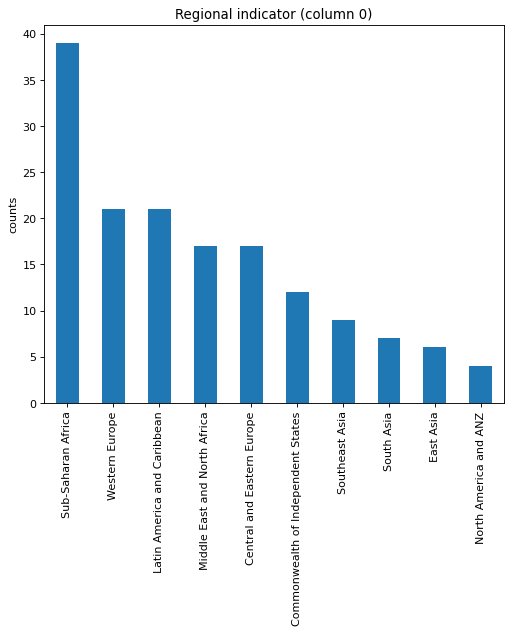

In [565]:
plotPerColumnDistribution(data, 10, 5)

In [485]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/var/folders/rv/p7k6sc6n5tq034kkhrc70cmw0000gn/T/ipykernel_4579/404578007.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data = data.dropna('columns')


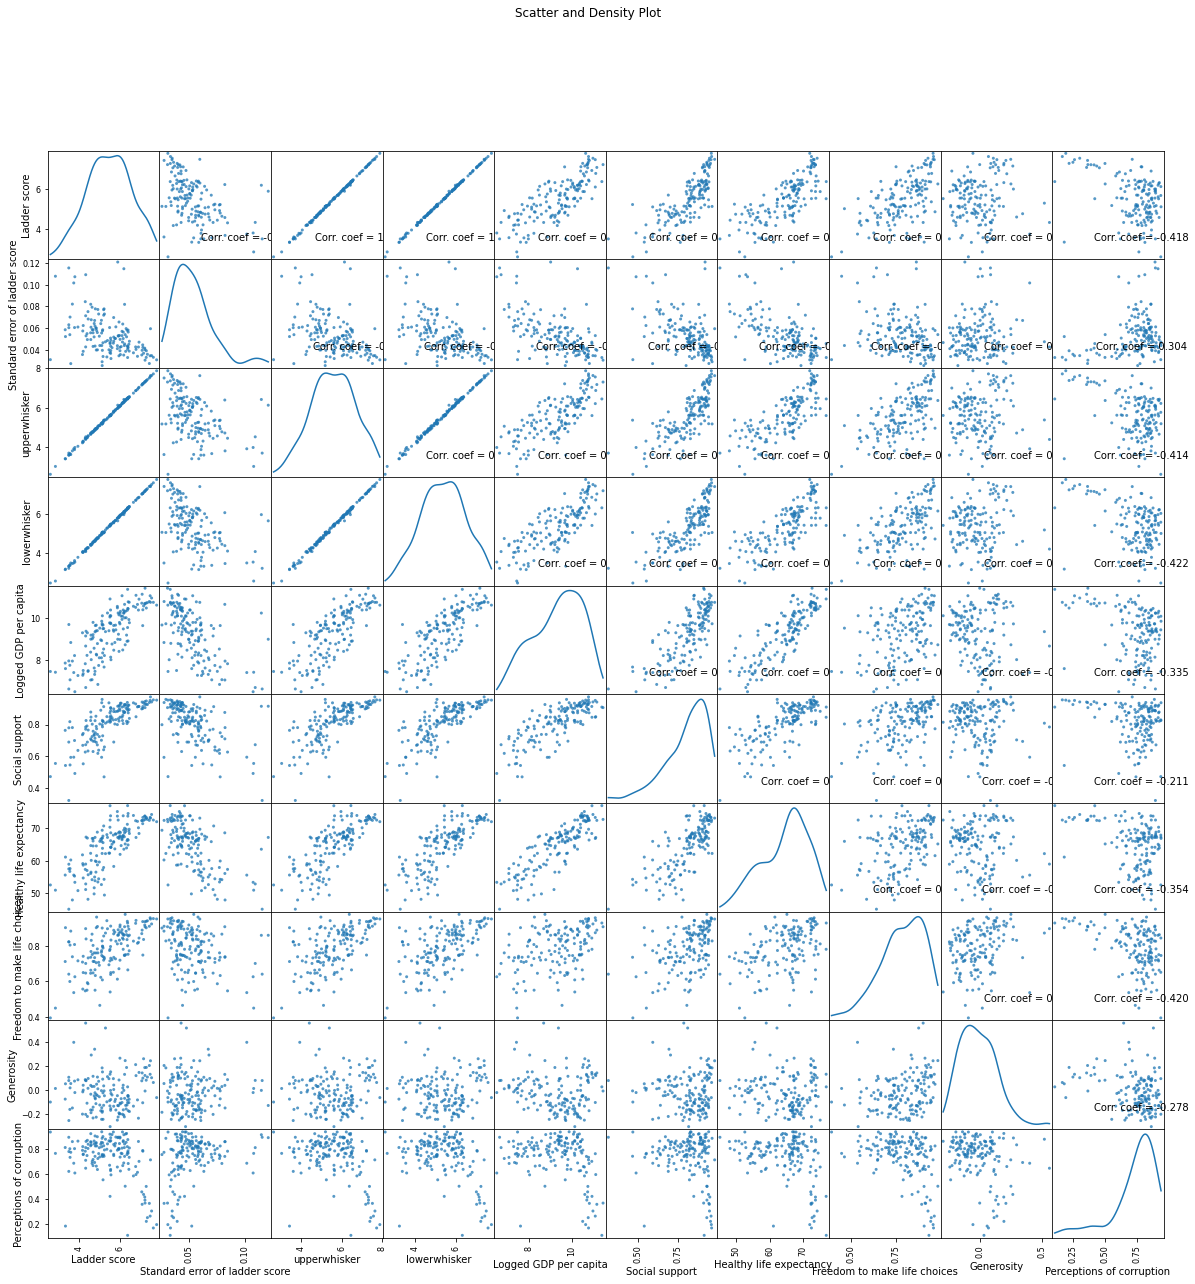

In [486]:
plotScatterMatrix(data, 20, 10)

In [487]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for World Happiness Matrix', fontsize=15)
    plt.show()

What I found to be interesting was that including filename created an error that killed the code, ie typical method # filename = data.datafr

/var/folders/rv/p7k6sc6n5tq034kkhrc70cmw0000gn/T/ipykernel_4579/580590079.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data = data.dropna('columns') # drop columns with NaN


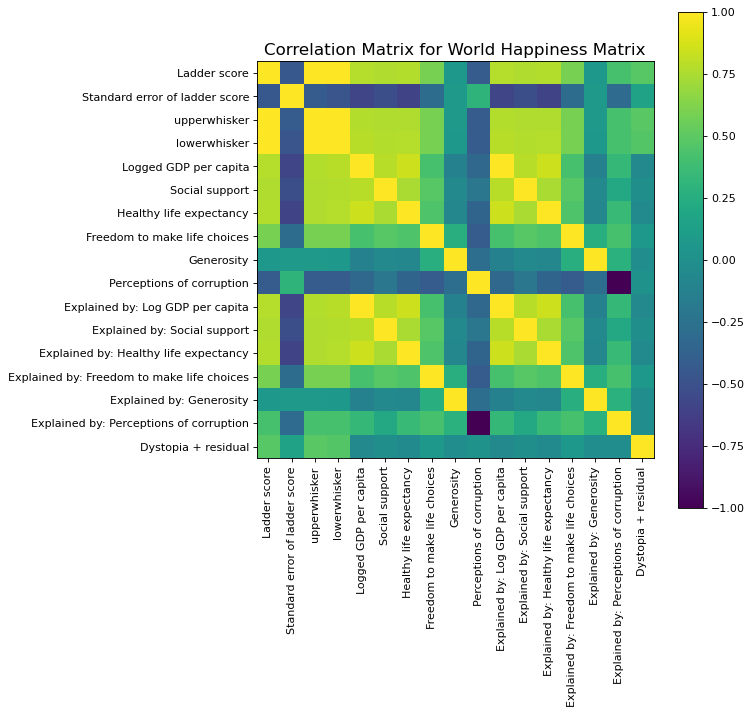

In [488]:
plotCorrelationMatrix(data, 8)

# Modeling! 

In [489]:

x = data[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption',	
'Ladder score in Dystopia',	'Explained by: Log GDP per capita',	'Explained by: Social support',	'Explained by: Healthy life expectancy',	
'Explained by: Freedom to make life choices',	'Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual']]
y = data['Country name']

# Splittling the data 
x_train, x_broh, y_train, y_broh = train_test_split(x,y, train_size=0.4, random_state=5)
x_valid, x_test, y_valid, y_test = train_test_split(x_broh,y_broh, test_size=0.5, random_state=5)

# Creating a continuous scale 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

# Principal Component Analysis 

In [490]:
pca = PCA(n_components=2)
pca.fit(x_train)
print(pca.components_)

[[-3.38530579e-01 -3.39877140e-01 -3.20604964e-01 -3.40677953e-01
  -2.33668773e-01 -5.79665433e-02  2.21030206e-01  6.61744490e-24
  -3.39877138e-01 -3.20604959e-01 -3.40677956e-01 -2.33668776e-01
  -5.79665358e-02 -2.21030205e-01 -5.50904050e-02]
 [ 1.17876490e-02 -1.87805460e-01 -1.91885678e-01 -1.14939100e-01
   2.80247705e-01  4.93006420e-01 -3.01132439e-01  0.00000000e+00
  -1.87805461e-01 -1.91885675e-01 -1.14939089e-01  2.80247714e-01
   4.93006422e-01  3.01132439e-01  6.86100659e-02]]


In [491]:
print(pca.explained_variance_ratio_)

[0.49372971 0.19355688]


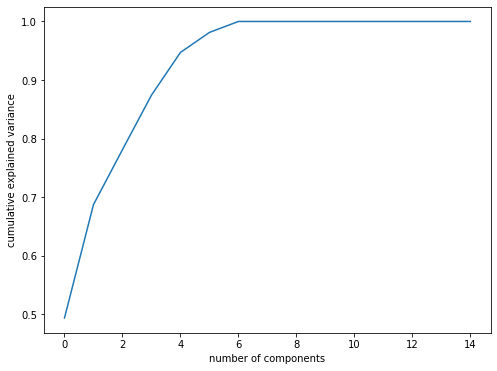

In [492]:
pca=PCA().fit(x_train)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [493]:
pca = PCA(2).fit_transform(x_train)
temp=PCA(2).fit(x_train)
temp.components_

array([[-3.38530579e-01, -3.39877140e-01, -3.20604964e-01,
        -3.40677953e-01, -2.33668773e-01, -5.79665433e-02,
         2.21030206e-01,  6.61744490e-24, -3.39877138e-01,
        -3.20604959e-01, -3.40677956e-01, -2.33668776e-01,
        -5.79665358e-02, -2.21030205e-01, -5.50904050e-02],
       [ 1.17876490e-02, -1.87805460e-01, -1.91885678e-01,
        -1.14939100e-01,  2.80247705e-01,  4.93006420e-01,
        -3.01132439e-01,  0.00000000e+00, -1.87805461e-01,
        -1.91885675e-01, -1.14939089e-01,  2.80247714e-01,
         4.93006422e-01,  3.01132439e-01,  6.86100659e-02]])

In [494]:
pca.shape

(61, 2)

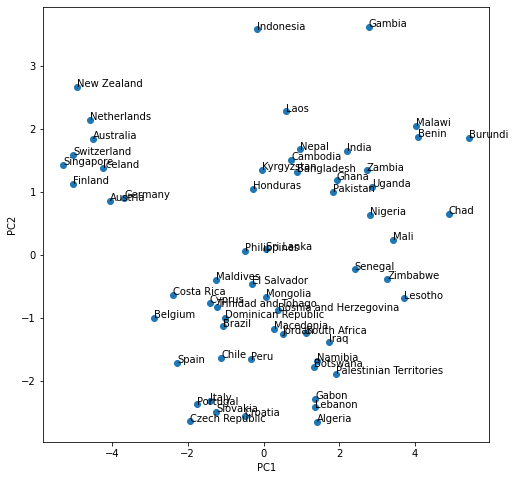

In [495]:
fig, ax = plt.subplots(figsize=(8,8))
xx=pca[:,0]
yy=pca[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(y_train):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()    

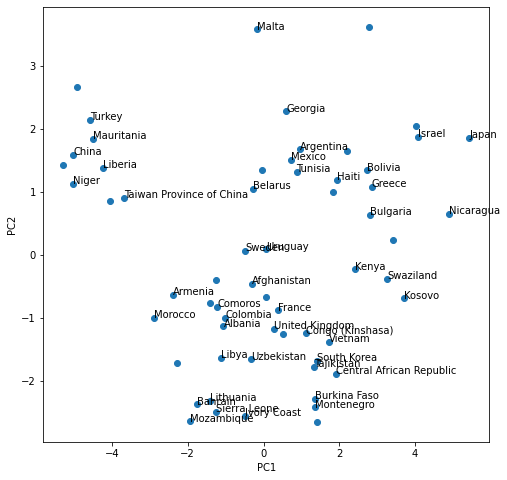

In [496]:
fig, ax = plt.subplots(figsize=(8,8))
xx=pca[:,0]
yy=pca[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(y_valid):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()    

# Lets Look into life expectancy models. 
# From the data is the Healthy Life Expectancy predictable? 

# Decision Tree classification! 
Model reduction, by including Explaination of Healthy Life Expentancy that there will be multi-corrilation. 

In [499]:
x = data[['Ladder score','Logged GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption',	
'Ladder score in Dystopia',	'Explained by: Log GDP per capita',	'Explained by: Social support',	
'Explained by: Freedom to make life choices',	'Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual']]
y = data['Healthy life expectancy']

# Splittling the data 
x_train, x_broh, y_train, y_broh = train_test_split(x,y, train_size=0.4, random_state=5)
x_valid, x_test, y_valid, y_test = train_test_split(x_broh,y_broh, test_size=0.5, random_state=5)

# Creating a continuous scale 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)


In [500]:
decisionTree = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)

In [501]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_5 = DecisionTreeRegressor(max_depth=5)
full_tree = DecisionTreeRegressor()
regr_1.fit(x_train, y_train)
regr_5.fit(x_train, y_train)
full_tree.fit(x_train, y_train)
full_tree.get_depth()

10

In [502]:
decisionTreetwo = DecisionTreeRegressor(max_depth=8).fit(x_valid,y_valid)

In [503]:
r = export_text(decisionTreetwo,feature_names=list(x.columns))
print(r)

|--- Logged GDP per capita <= -0.57
|   |--- Explained by: Social support <= 0.23
|   |   |--- Social support <= -2.86
|   |   |   |--- value: [45.20]
|   |   |--- Social support >  -2.86
|   |   |   |--- Generosity <= 0.77
|   |   |   |   |--- Explained by: Social support <= -0.67
|   |   |   |   |   |--- Logged GDP per capita <= -0.99
|   |   |   |   |   |   |--- Explained by: Generosity <= 0.75
|   |   |   |   |   |   |   |--- Freedom to make life choices <= -0.19
|   |   |   |   |   |   |   |   |--- value: [52.75]
|   |   |   |   |   |   |   |--- Freedom to make life choices >  -0.19
|   |   |   |   |   |   |   |   |--- value: [53.50]
|   |   |   |   |   |   |--- Explained by: Generosity >  0.75
|   |   |   |   |   |   |   |--- value: [50.87]
|   |   |   |   |   |--- Logged GDP per capita >  -0.99
|   |   |   |   |   |   |--- value: [49.50]
|   |   |   |   |--- Explained by: Social support >  -0.67
|   |   |   |   |   |--- Explained by: Perceptions of corruption <= 0.03
|   |   |  

In [504]:
mean_squared_error(full_tree.predict(x_valid), y_valid)

43.29460598509085

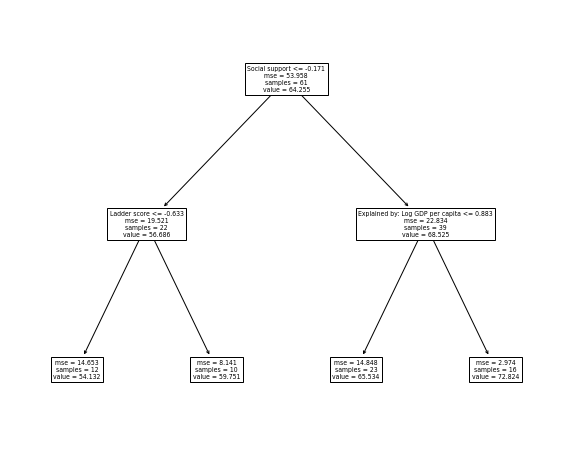

In [505]:
plt.figure(figsize=(10, 8))
tree.plot_tree(regr_1,feature_names=list(x.columns))
plt.show()

In [506]:
path = full_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

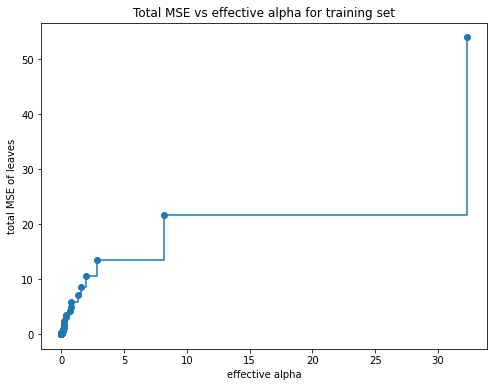

In [507]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total MSE of leaves")
ax.set_title("Total MSE vs effective alpha for training set")
plt.show()

In [508]:
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    reg.fit(x_train, y_train)
    regs.append(reg)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      regs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 32.31823831089445


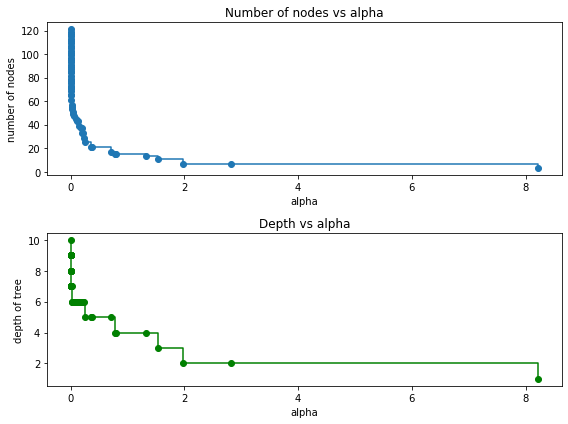

In [509]:
regs = regs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [reg.tree_.node_count for reg in regs]
node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]
fig, ax = plt.subplots(2, 1,figsize=(8,6))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post",color='g')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

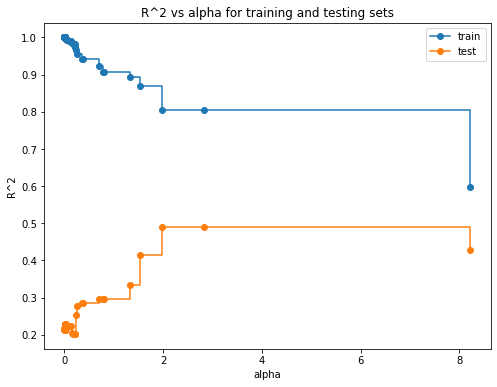

In [510]:
train_scores = [reg.score(x_train, y_train) for reg in regs]
valid_scores = [reg.score(x_valid, y_valid) for reg in regs]

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("alpha")
ax.set_ylabel("R^2")
ax.set_title("R^2 vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

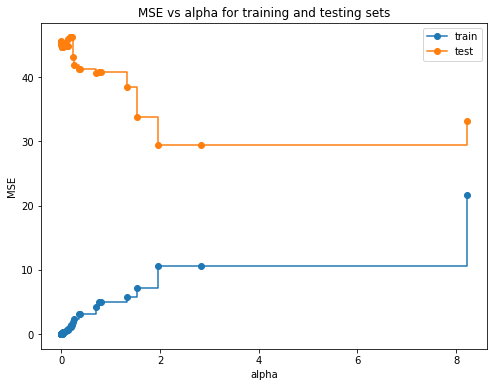

In [511]:
train_scores = [mean_squared_error(reg.predict(x_train), y_train) for reg in regs]
valid_scores = [mean_squared_error(reg.predict(x_valid),y_valid) for reg in regs]

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [512]:
cvres=[]
for a in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha= a)
    cvreg = cross_validate(reg, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cvres.append(cvreg['test_score'].mean())

In [513]:
optalp=ccp_alphas[np.argmax(cvres)]
optalp

0.7020590212264697

In [514]:
regO = DecisionTreeRegressor(random_state=0, ccp_alpha=optalp).fit(x_train,y_train)

In [515]:
print(regO.get_depth(),':',full_tree.get_depth())

5 : 10


# KNN 

In [516]:
knn_cv_results=[]
for k in range(1,50):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    cv_nn = cross_validate(knn_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    knn_cv_results.append(cv_nn['test_score'].mean())

/Users/patrickconroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/patrickconroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/patrickconroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/patrickconroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/patrickconroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Use

In [517]:
np.argmax(knn_cv_results)

48

In [518]:
knn_reg_model=KNeighborsRegressor(n_neighbors=4).fit(x_train, y_train)
knn_reg_model.score(x_valid,y_valid)

0.7008037854349722

In [519]:
knn_reg_model=KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
knn_reg_model.score(x_valid,y_valid)

0.7224295632043501

In [520]:
knn_reg_model=KNeighborsRegressor(n_neighbors=6).fit(x_train, y_train)
knn_reg_model.score(x_valid,y_valid)

0.7013868655891211

In [521]:
knn_reg_model=KNeighborsRegressor(n_neighbors=7).fit(x_train, y_train)
knn_reg_model.score(x_valid,y_valid)

0.6568463706058016

5 looks to be the lucky number on neighbors

# Bagging 

In [522]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,oob_score=True,random_state=5).fit(x_train, y_train)
print("R^2 is {}".format(regr.score(x_train,y_train)),":",":", "MSE is {}".format(mean_squared_error(regr.predict(x_train),y_train)))

R^2 is 0.9561170796772782 : : MSE is 2.3678176562600277


In [523]:
num_trees=np.linspace(50,500,10)
oob_res=[]
for trs in num_trees:
    res = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=int(trs),oob_score=True,random_state=0).fit(x_train, y_train)
    oob_res.append(res.oob_score_)
num_trees[np.argmax(oob_res)]

50.0

In [524]:
opt_trs=int(num_trees[np.argmax(oob_res)])
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=opt_trs,random_state=5).fit(x_train, y_train)
np.round(regr.score(x_valid,y_valid),3)

0.64

Seems a bit high though. 

# Gradient Booser

In [576]:
breg = GradientBoostingRegressor(random_state=5,learning_rate=0.1,n_estimators=500,max_depth=2).fit(x_train,y_train)
breg.score(x_valid,y_valid)

0.6265091048901599

In [577]:
parameters = {'learning_rate':[0.1,0.01], 'n_estimators':[300,400,500],'max_depth':[2,3,4,5]}

In [578]:
bmod = GradientBoostingRegressor(random_state=5)
boost_regr = GridSearchCV(bmod, parameters)
boost_regr.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [300, 400, 500]})

In [579]:
newdataframe=pd.DataFrame.from_dict(boost_regr.cv_results_)
newdataframe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054595,0.000707,0.000436,0.000031,0.1,2,300,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.643501,0.548287,0.768656,0.713828,0.702306,0.675315,0.074930,18
1,0.069990,0.000618,0.000389,0.000042,0.1,2,400,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.646505,0.550634,0.769507,0.712422,0.704358,0.676685,0.074106,13
2,0.089243,0.001545,0.000476,0.000045,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.647710,0.551730,0.770173,0.711681,0.705050,0.677269,0.073785,12
3,0.061191,0.000625,0.000485,0.000083,0.1,3,300,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.635679,0.442497,0.834297,0.631833,0.837567,0.676374,0.147825,16
4,0.081972,0.000558,0.000552,0.000077,0.1,3,400,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.635690,0.442554,0.834288,0.631796,0.837616,0.676389,0.147818,15


In [584]:
matterofpreference = GradientBoostingRegressor(random_state=5,learning_rate=0.01,n_estimators=400,max_depth=4).fit(x_train,y_train)
np.round(matterofpreference.score(x_valid,y_valid),3)

0.534

# PCA and Gradiant Boosing. 

In [581]:
x = data[['Ladder score','Logged GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption',	
'Ladder score in Dystopia',	'Explained by: Log GDP per capita',	'Explained by: Social support',		
'Explained by: Freedom to make life choices',	'Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual']]
y = data['Healthy life expectancy']

# Splittling the data 
x_train, x_broh, y_train, y_broh = train_test_split(x,y, train_size=0.4, random_state=5)
x_valid, x_test, y_valid, y_test = train_test_split(x_broh,y_broh, test_size=0.5, random_state=5)

# Creating a continuous scale 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [582]:
cvres=[]
num_pcs=[1,2,3,4,5,6,7,8,9,10]
for a in num_pcs:
    reg = LinearRegression()
    cvreg = cross_validate(reg, pca[:,0:a], y_train, cv=5, scoring='r2')
    cvres.append(cvreg['test_score'].mean())

In [583]:
cvres

[0.7872077234525208,
 0.806018998008868,
 0.806018998008868,
 0.806018998008868,
 0.806018998008868,
 0.806018998008868,
 0.806018998008868,
 0.806018998008868,
 0.806018998008868,
 0.806018998008868]

In [532]:
np.argmax(cvres)

1

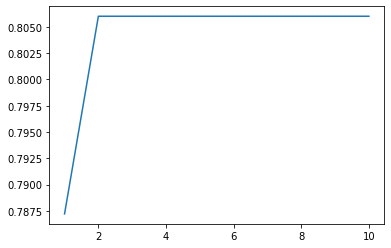

In [533]:
plt.plot(range(1,11),cvres)

# K Means Clusters 

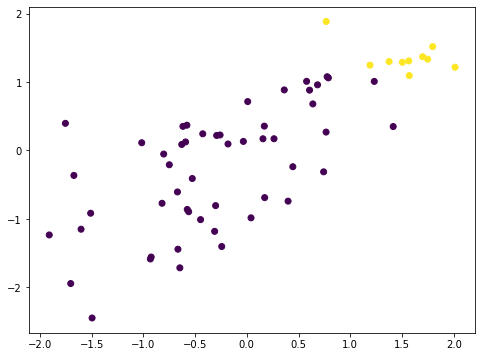

In [534]:
kmeans = KMeans(n_clusters=2, random_state=5).fit(x_train)
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0],x_train[:,1],c=kmeans.labels_,cmap='viridis')
plt.show()

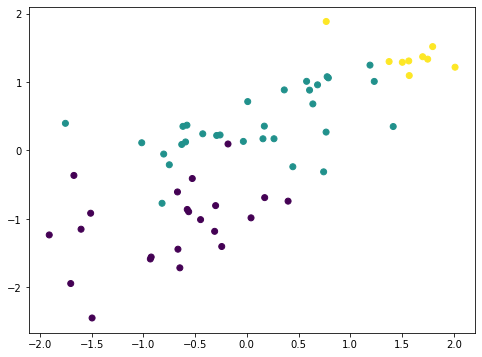

In [535]:
kmeans = KMeans(n_clusters=3, random_state=5).fit(x_train)
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0],x_train[:,1],c=kmeans.labels_,cmap='viridis')
plt.show()

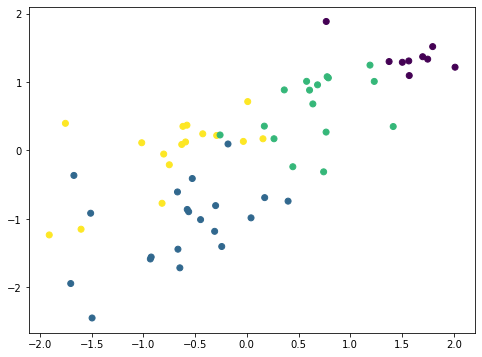

In [536]:
kmeans = KMeans(n_clusters=4, random_state=5).fit(x_train)
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0],x_train[:,1],c=kmeans.labels_,cmap='viridis')
plt.show()

# Agglomerative (Heierarchical) Clustering

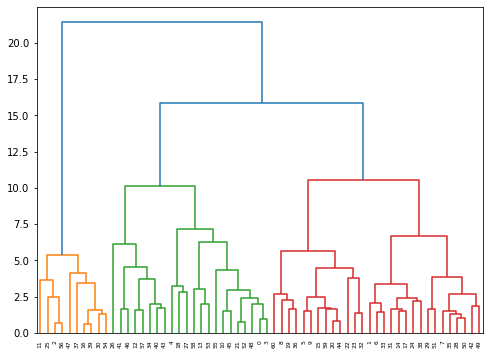

In [537]:
linkage_array = ward(x_train)
plt.figure(figsize=(8,6))
dn = dendrogram(linkage_array)
plt.show()

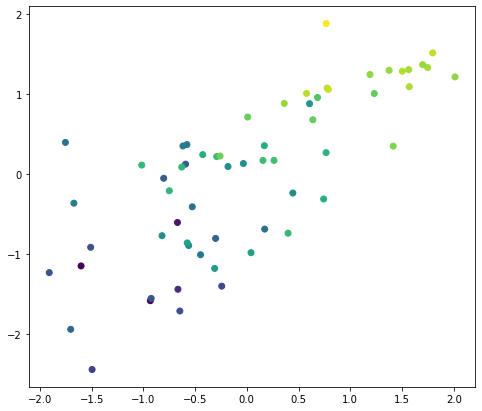

In [538]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='viridis')
plt.show()

In [539]:
hierarchical_clustering_example = AgglomerativeClustering(4).fit(x_train)
hierarchical_clustering_example.labels_[0:10]

array([0, 2, 3, 0, 0, 1, 2, 2, 1, 1])

In [542]:
hc_results=pd.DataFrame(x_train,columns=['Ladder score','Logged GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption',	
'Ladder score in Dystopia',	'Explained by: Log GDP per capita',	'Explained by: Social support',	
'Explained by: Freedom to make life choices',	'Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual'])
hc_results['Cluster_Assignment']=hierarchical_clustering_example.labels_

In [543]:
hc_results[hc_results['Cluster_Assignment']==3]

,Ladder score,Logged GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Cluster_Assignment
2,1.374480,1.298953,0.760828,0.696477,0.574885,-1.541771,-1.0,1.298953,0.760827,0.696477,0.574885,1.541771,0.506885,3
11,1.747266,1.334054,1.441286,1.459578,1.748128,-0.164823,-1.0,1.334054,1.441286,1.459578,1.748128,0.164823,0.776734,3
16,1.502307,1.288158,1.173619,1.146364,1.350745,-1.764277,-1.0,1.288158,1.173619,1.146364,1.350744,1.764277,0.237026,3
25,1.189870,1.246683,0.875364,0.192968,-0.542820,-0.701021,-1.0,1.246683,0.875364,0.192968,-0.542820,0.701021,0.593949,3
30,1.795441,1.517217,1.155592,1.201639,0.755915,-2.365356,-1.0,1.517217,1.155592,1.201639,0.755915,2.365356,0.596625,3
37,2.011791,1.216324,1.258683,1.462202,-0.407677,-2.949408,-1.0,1.216324,1.258683,1.462202,-0.407677,2.949408,1.269568,3
39,1.698918,1.369519,1.122305,1.081925,1.471416,-2.036401,-1.0,1.369519,1.122305,1.081925,1.471416,2.036401,0.599642,3
47,0.766909,1.884286,0.863123,1.251332,0.221007,-3.411436,-1.0,1.884286,0.863123,1.251332,0.221007,3.411436,-1.708514,3
54,1.569091,1.094149,1.211903,1.340936,1.358750,-2.810821,-1.0,1.094149,1.211902,1.340936,1.358750,2.810821,0.234260,3
56,1.564395,1.307790,1.022717,1.001812,0.611819,-1.306967,-1.0,1.307790,1.022717,1.001812,0.611819,1.306967,0.675210,3


In [544]:
Z = linkage(x_train, 'complete')

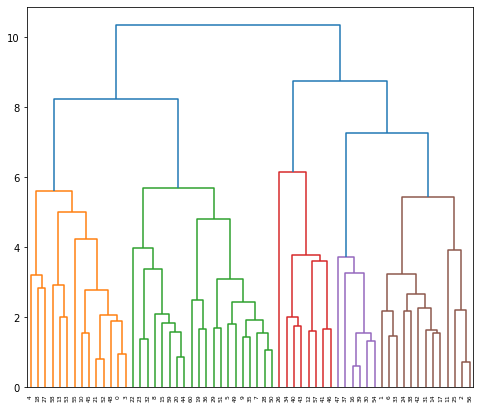

In [545]:
plt.figure(figsize=(8,7))
dn = dendrogram(Z)
plt.show()

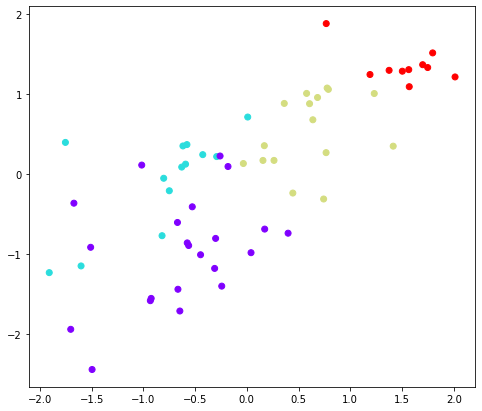

In [546]:
hclust = AgglomerativeClustering(4).fit(x_train)
plt.figure(figsize=(8,7))
plt.scatter(x_train[:,0],x_train[:,1],c=hclust.labels_,cmap='rainbow')
plt.show()

# Running the test Set! 
I'll go with K Neighhbors 


In [585]:
x = data[['Ladder score','Logged GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption',	
'Ladder score in Dystopia',	'Explained by: Log GDP per capita',	'Explained by: Social support',		
'Explained by: Freedom to make life choices',	'Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual']]
y = data['Healthy life expectancy']

# Splittling the data 
x_train, x_broh, y_train, y_broh = train_test_split(x,y, train_size=0.4, random_state=5)
x_valid, x_test, y_valid, y_test = train_test_split(x_broh,y_broh, test_size=0.5, random_state=5)

# Creating a continuous scale 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [586]:
knn_reg_model=KNeighborsRegressor(n_neighbors=4).fit(x_valid, y_valid)
knn_reg_model.score(x_test,y_test)

0.6979307168700375

# THis was a good experiment but life expectancy through machine learning seems to difficult to create a great explaintion of the trend. 
THe data did incicate that there is some predictive power in the model, but the limits of the explainability of machine learning stops me from forgetting the basic regression 

# Creating a more simple model. 
Using Ladder Score social support freedom to make choices generosity and perceptions of curruption I am identifying the variables not the effect of the varables and the varaibles.  


In [557]:
x = data[['Ladder score','Social support','Freedom to make life choices','Generosity','Perceptions of corruption',	
'Ladder score in Dystopia']]
y = data['Healthy life expectancy']

# Splittling the data 
x_train, x_broh, y_train, y_broh = train_test_split(x,y, train_size=0.4, random_state=5)
x_valid, x_test, y_valid, y_test = train_test_split(x_broh,y_broh, test_size=0.5, random_state=5)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

# Lasso regression

In [558]:
regressionone = Lasso(alpha = .01).fit(x_train,y_train)
y_pred = regressionone.predict(x_train)
r2 = regressionone.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

This model has an R^2 on the train set of 0.679999955819343


In [559]:
regressionone = Lasso(alpha = .01).fit(x_train,y_train)
y_pred = regressionone.predict(x_valid)
r2 = regressionone.score(x_valid, y_valid)
print(f'This model has an R^2 on the validation set of {r2}')

This model has an R^2 on the validation set of 0.6295419364991346


In [560]:
regressionone = Lasso(alpha = .01).fit(x_valid,y_valid)
y_pred = regressionone.predict(x_test)
r2 = regressionone.score(x_test, y_test)
print(f'This model has an R^2 on the test set of {r2}')

This model has an R^2 on the test set of 0.40075629345131947
